## **Instructions**

Les packages se présentent sous la forme d'un certain nombre de fichiers sources python (extension .py).<br>
Ils constituent une répartition des fonctions utiles pour le projet selon l'utilisation qui en est faite (pré-traitement des données, gestion graphique ...).<br>
L'ensemble des librairies sont inclues dans un répertoire "packages" situe à la racine du projet, et qu'il convient donc de créer au préalable pour y déposer les sources.<br>
Figure également dans ce répertoire un fichier d'initialisation destine à effectuer un import de l'ensemble des librairies, aussi l'unique import nécessaire dans le notebook appelant devra se présenter sous la forme suivante :


In [1]:
import packages

Dans l'instruction ci-dessus "packages" correspond au nom du répertoire qui abrite l'ensemble des librairies. Il se peut donc que l'utilisateur lui préfère un autre nom. Chaque appel à une fonction issue d'une librairie devra s'effectuer sous la forme {nom rep}.{nom fonction} Par exemple : packages.load_train()

Import de librairies complementaires necessaires a l'execution de ce notebook.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# **1. Librairie data_processing**

  Fonctions disponibles :
  - copy_data_from_drive : Copie et decompression des fichiers depuis le drive google
  - load_train           : Chargement des donnees issues du fichier train.csv
  - label_parsing        : Separation nom de l'image / label dans 2 colonnes distinctes
  - one_hot_encoding     : Codage disjonctif des classes
  - get_labels           : Reconstitution d'une description complete des classes depuis une liste de probabilites ou un codage disjonctif

### *copy_data_from_drive*

Copie des donnees depuis le drive.<br>
Renvoie VRAI si l'operation a reussie, FAUX si un probleme (repertoire ou fichier inexistant) a ete rencontre<br>
Les arguments "from_path", "filename" et "to_path" sont disponibles.

Attention : il faut que le drive soit monte au prealable.

In [5]:
if not packages.copy_data_from_drive():
      print("Erreur au chargement des donnees depuis le drive")

### *load_train*

Chargement du fichier train.csv :<br>
Il est possible de preciser un argument filename, par defaut celui-ci vaut "train.csv"

In [6]:
train = packages.load_train()
train.head(5)

,Image_Label,EncodedPixels
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...
2,0011165.jpg_Gravel,NaN
3,0011165.jpg_Sugar,NaN
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...


### *label_parsing*

Separation nom de l'image / label dans 2 colonnes distinctes.
L'instruction dropna est disponible en argument facultatif (Vrai par defaut).
Il est possible de preciser un argument "sep" stipulant sur quel caractere le split doit etre fait, par defaut celui-ci est a "_"

In [7]:
#Parsing sans suppression des NA restants
df1 = packages.label_parsing(train, drop_na=False)
df1.head(5)

,EncodedPixels,image,label
0,264918 937 266318 937 267718 937 269118 937 27...,0011165.jpg,Fish
1,1355565 1002 1356965 1002 1358365 1002 1359765...,0011165.jpg,Flower
2,NaN,0011165.jpg,Gravel
3,NaN,0011165.jpg,Sugar
4,233813 878 235213 878 236613 878 238010 881 23...,002be4f.jpg,Fish


In [8]:
#Parsing avec suppression des NA restants
train = packages.label_parsing(train)
train.head(5)

,EncodedPixels,image,label
0,264918 937 266318 937 267718 937 269118 937 27...,0011165.jpg,Fish
1,1355565 1002 1356965 1002 1358365 1002 1359765...,0011165.jpg,Flower
4,233813 878 235213 878 236613 878 238010 881 23...,002be4f.jpg,Fish
5,1339279 519 1340679 519 1342079 519 1343479 51...,002be4f.jpg,Flower
7,67495 350 68895 350 70295 350 71695 350 73095 ...,002be4f.jpg,Sugar


### *one_hot_encoding*

Codage disjonctif **avec** reinitialisation des indexes

In [9]:
train_encoded = packages.one_hot_encoding(train)
train_encoded.head()

,image,Fish,Flower,Gravel,Sugar
0,0011165.jpg,1,1,0,0
1,002be4f.jpg,1,1,0,1
2,0031ae9.jpg,1,1,0,1
3,0035239.jpg,0,1,1,0
4,003994e.jpg,1,0,1,1


Codage disjonctif **sans** reinitialisation des indexes

In [10]:
train_encoded = packages.one_hot_encoding(train, reset_index=False)
train_encoded.head()

,Fish,Flower,Gravel,Sugar
image,,,,
0011165.jpg,1,1,0,0
002be4f.jpg,1,1,0,1
0031ae9.jpg,1,1,0,1
0035239.jpg,0,1,1,0
003994e.jpg,1,0,1,1


### *get_labels*

Generation d'un label complet correspondant aux valeurs superieures ou egales aux seuils indiques.
Les valeurs sont passees en argument obligatoire sous la forme d'une liste. Les labels correspondant sont facultatifs, de meme que les seuils. Par defaut les seuils sont initialises a 0,5.

In [11]:
packages.get_labels([0, 0, 1, 1])

'Gravel,Sugar'

In [12]:
packages.get_labels([0, 1, 1, 0], labels=['classe 1', 'Classe 2', 'Classe 3', 'Classe 4'])

'Classe 2,Classe 3'

In [13]:
packages.get_labels([0.6, 0.9, 0.3, 0.9], threshold=[0.72, 0.87, 0.21, 0.83])

'Flower,Gravel,Sugar'

# **2. Librairie graphics**

Fonctions disponibles :

- rleToMask : Conversion d'un encodage RLE en masque
- surfaceFromRle : Calcul du nombre de pixels couverts par le masque issu d'un encodage RLE
- imshowSuperimposed : Superposition d'une image RGB et de sa segmentation RLE, colorée par classe

### *rleToMask*

Generation d'un masque a partir d'un encodage RLE

In [14]:
rle = train.EncodedPixels[0]   #On extrait le premier code RLE du dataset pour l'exemple
mask = packages.rleToMask(rle)   
print("Type du masque de sortie : ", type(mask))         #le masque est un np.array
print("Format du masque de sortie : ", mask.shape)       #Si rien n'est precise, le format en sortie sera 1400*2100

Type du masque de sortie :  <class 'numpy.ndarray'>
Format du masque de sortie :  (1400, 2100)


In [15]:
rle = train.EncodedPixels[0]   #On extrait le premier code RLE du dataset pour l'exemple
mask = packages.rleToMask(rle, (2000, 3000))   
print("Type du masque de sortie : ", type(mask))         #le masque est un np.array
print("Format du masque de sortie : ", mask.shape)       #Le masque ici a ete redimensionne

Type du masque de sortie :  <class 'numpy.ndarray'>
Format du masque de sortie :  (2000, 3000)


### *surfaceFromRle*

Renvoie le nombre de pixels couverts par le masque dont on fournit le code RLE.

In [16]:
train = train.reset_index(drop=True)    #Reinitialisation des indexes pour les besoins de l'exemple

#On itere sur les 4 premieres observations du dataset
for i in range(4):
    rle = train.EncodedPixels[i]   #On extrait le code RLE de l'observation courante
    surface = packages.surfaceFromRle(rle) 
    print('Surface du masque ', i, ' : ', surface, ' pixels')

Surface du masque  0  :  932312  pixels
Surface du masque  1  :  1156107  pixels
Surface du masque  2  :  1684325  pixels
Surface du masque  3  :  592697  pixels


### *imshowSuperimposed*

Superposition d'une image RGB et de sa segmentation RLE, colorée par classe.<br>
Cette fonction va produire pour chacune des classes presente dans une image le resultat de la superposition de l'image d'origine avec le masque correspondant.<br><br>
Les parametres sont les suivants (tous obligatoires) :
- repImage : nom du répertoire vers les images
- nomImage : nom de l'image à afficher
- rle : encodage RLE du masque à superposer
- classe : nom de la classe du masque, parmi {'Fish', 'Flower', 'Gravel', 'Sugar'}
- rleSize : taille du masque RLE en pixels

Renvoie un dictionnaire contenant :
* 'Superimposed' : image sur laquelle on superpose sa segmentation colorée en fonction de la classe
* 'Image' : image originale
* 'Segmentation' : masque coloré
* 'Label' : le nom de l'image et la classe

<function matplotlib.pyplot.show>

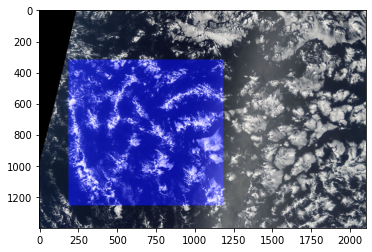

In [18]:
repTrain = 'train_images'
nomImage = train['image'][0]
rle = train['EncodedPixels'][0]
classe = train['label'][0]
dico = packages.imshowSuperimposed(repImage=repTrain, nomImage = nomImage,
                          rle = rle, classe = classe)
plt.imshow(dico['Superimposed'])
plt.show

# **3. Librairie data_generation**

  Fonctions disponibles :
  - splitValid : Partage d'un set de donnees selon une proportion ou un nombre d'observations
  - makeGen    : Generateur d'images, instanciation d'un objet Keras.ImageDataGenerator

### *splitValid*

Partage d'un set de donnees selon une proportion ou un nombre d'observations

In [19]:
#Ici on split le dataframe train en deux dataframes distincts sur une base 80 / 20
df1, df2 = packages.splitValid(train, randomState = 123, test_size = 0.2, shuffle = True)
print("Nb obs train : ", train.shape)
print("Nb obs df1   : ", df1.shape)
print("Nb obs df2   : ", df2.shape)

Nb obs train :  (11836, 3)
Nb obs df1   :  (9468, 3)
Nb obs df2   :  (2368, 3)


In [20]:
#Ici on split le dataframe train en 2 groupes de 2 dataframes X et y, en precisant cette fois le nombre d'observations exact attendu
X_df1, X_df2, y_df1, y_df2 = packages.splitValid(train['image'], train['label'], randomState = 123, test_size = 200, shuffle = True)
print("Nb obs train : ", train.shape)
print("Nb obs df1   : ", X_df1.shape)
print("Nb obs df2   : ", X_df2.shape)

Nb obs train :  (11836, 3)
Nb obs df1   :  (11636,)
Nb obs df2   :  (200,)
